In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

from mpl_toolkits.axes_grid1 import make_axes_locatable

import math

from matplotlib import cm

import matplotlib.lines as mlines

import netCDF4 as nc # import librarie

from netCDF4 import Dataset

%matplotlib inline

####### This link will be very useful for plotting netcdf4 files: http://www2.geog.ucl.ac.uk/~plewis/geogg122_local/geogg122.old/Chapter3_Scientific_Numerical_Python/Scientific_Numerical_Python.html


https://www.science-emergence.com/Articles/How-to-change-imshow-axis-values-labels-in-matplotlib-/

https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html

In [45]:
fp='Data/daymet_v3_prcp_2016_na.nc4' # your file name with the eventual path
nc_data = nc.Dataset(fp) # reading the nc file and creating Dataset

print(nc_data)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    start_year: 2016
    source: Daymet Software Version 3.0
    Version_software: Daymet Software Version 3.0
    Version_data: Daymet Data Version 3.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    dimensions(sizes): x(7814), y(8075), time(365), nv(2)
    variables(dimensions): float32 x(x), float32 y(y), float32 lat(y,x), float32 lon(y,x), float32 time(time), int16 yearday(time), float32 time_bnds(time,nv), int16 lambert_conformal_conic(), float32 prcp(time,y,x)
    groups: 



In [10]:
y = nc_data.variables['lat'][:] # read latitutde variable
x = nc_data.variables['lon'][:] # read longitude variable
print((y,x)) # print latitutde, longitude

(masked_array(
  data=[[58.527702 , 58.536274 , 58.54484  , ..., 69.09396  , 69.08651  ,
         69.07905  ],
        [58.52478  , 58.533348 , 58.54192  , ..., 69.0904   , 69.08294  ,
         69.07548  ],
        [58.521854 , 58.530426 , 58.538994 , ..., 69.08683  , 69.07937  ,
         69.071915 ],
        ...,
        [ 6.0955505,  6.0989065,  6.1022615, ..., 10.021997 , 10.019393 ,
         10.0167885],
        [ 6.088467 ,  6.091822 ,  6.0951767, ..., 10.014288 , 10.011684 ,
         10.00908  ],
        [ 6.0813837,  6.0847383,  6.0880923, ..., 10.006578 , 10.003976 ,
         10.001372 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32), masked_array(
  data=[[ 156.37123  ,  156.37682  ,  156.38242  , ...,   -6.172987 ,
           -6.1630044,   -6.1530266],
        [ 156.38762  ,  156.39322  ,  156.3988   , ...,   -6.193871 ,
           -6.183884 ,   -6.173902 ],
        [ 156.404    ,  156.4096   ,  156.41519  , ...,   -6.2147493,
           -6.2047586,   -6.1947727],
     

In [25]:
# Reading in precipitation attribute
#precipitation = nc_data.variables['prcp'][0,0,:] # read precipitation data
print(nc_data.variables['prcp']) # print the variable attributes

<class 'netCDF4._netCDF4.Variable'>
float32 prcp(time, y, x)
    _FillValue: -9999.0
    long_name: daily total precipitation
    units: mm/day
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: sum
unlimited dimensions: time
current shape = (365, 8075, 7814)
filling on


In [29]:
# the netCDF file has dimensions stored as a dictionary
print(nc_data.dimensions.keys())

odict_keys(['x', 'y', 'time', 'nv'])


In [30]:
# the netCDF file has variables stored as a dictionary
print(nc_data.variables.keys())

odict_keys(['x', 'y', 'lat', 'lon', 'time', 'yearday', 'time_bnds', 'lambert_conformal_conic', 'prcp'])


In [31]:
# We only want to plot the precipitation data
precipitation = nc_data.variables['prcp']

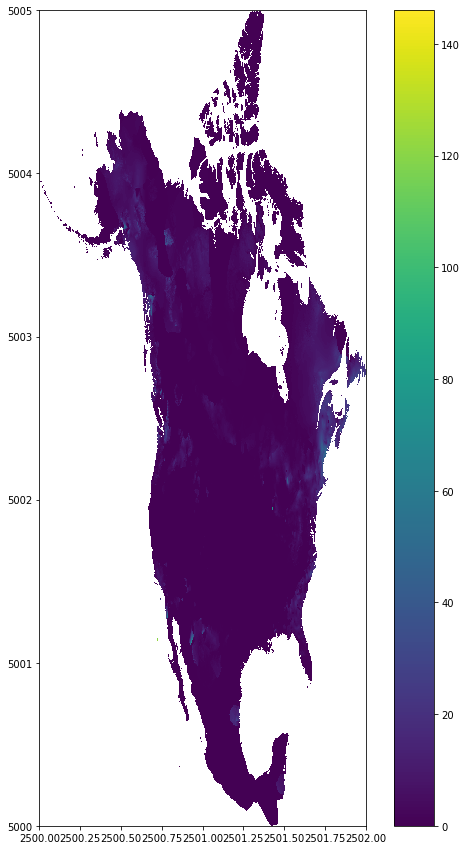

In [49]:
# Here, precipitation has a dimension of 365xlatxlong, so each day is stores as a single image
plt.figure(figsize = (10,15))
plt.imshow(precipitation[364], interpolation = 'none', extent = [2500,2502,5000,5005])
plt.colorbar()